Notebook for generating plots after benching Whisper

In [21]:
import os
import json
import pandas as pd

from asr_benchmark.visualization.plots import make_plots, plot_rtf_curve
from asr_benchmark.utils.utils import load_data

pd.set_option("future.no_silent_downcasting", True)

In [22]:
INPUT_FOLDER = "whisper/output"
OUTPUT_FOLDER = "whisper/plots"

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
df = pd.DataFrame(load_data(INPUT_FOLDER))
# print(df.head())
if "accurate" not in df.columns:
    df["accurate"] = pd.NA
if "streaming" not in df.columns:
    df["streaming"] = pd.NA
if "docker_image" not in df.columns:
    df["docker_image"] = pd.NA
if "streaming_min_chunk_size" not in df.columns:
    df["streaming_min_chunk_size"] = pd.NA
if "previous_text" not in df.columns:
    df["previous_text"] = pd.NA
if "num_threads" not in df.columns:
    df["num_threads"] = pd.NA

# GPU

## Transformers

### Attention and Batch Size

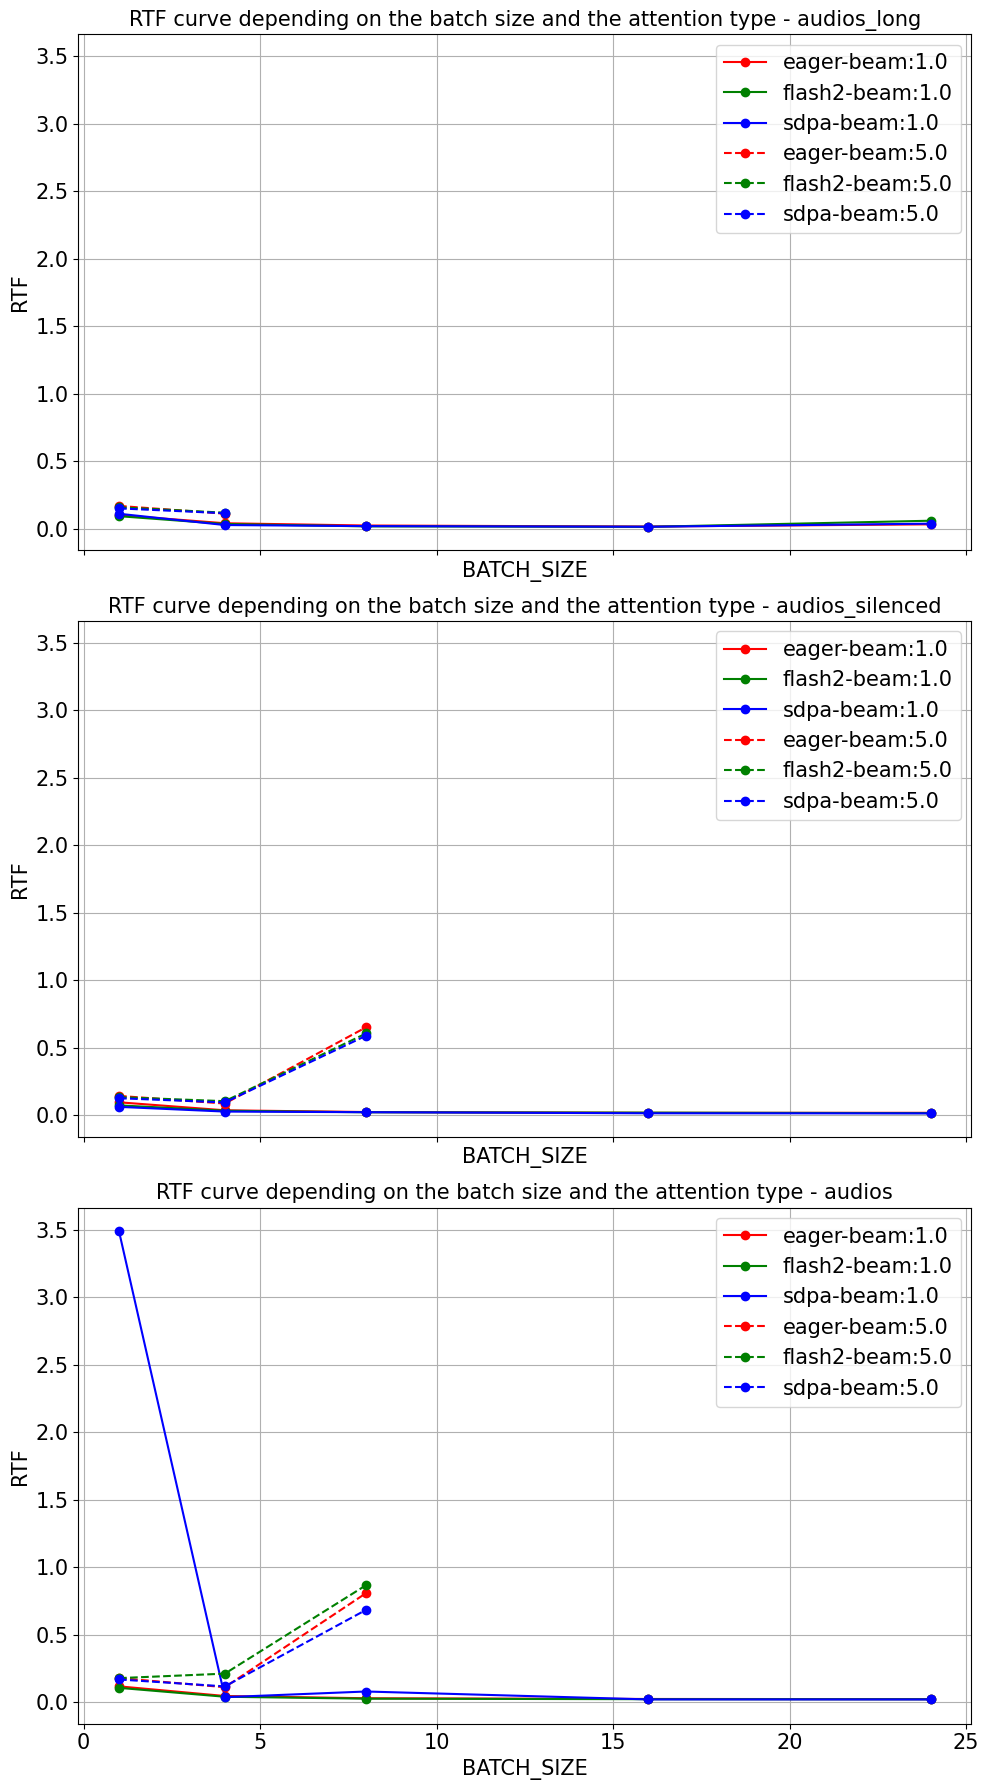

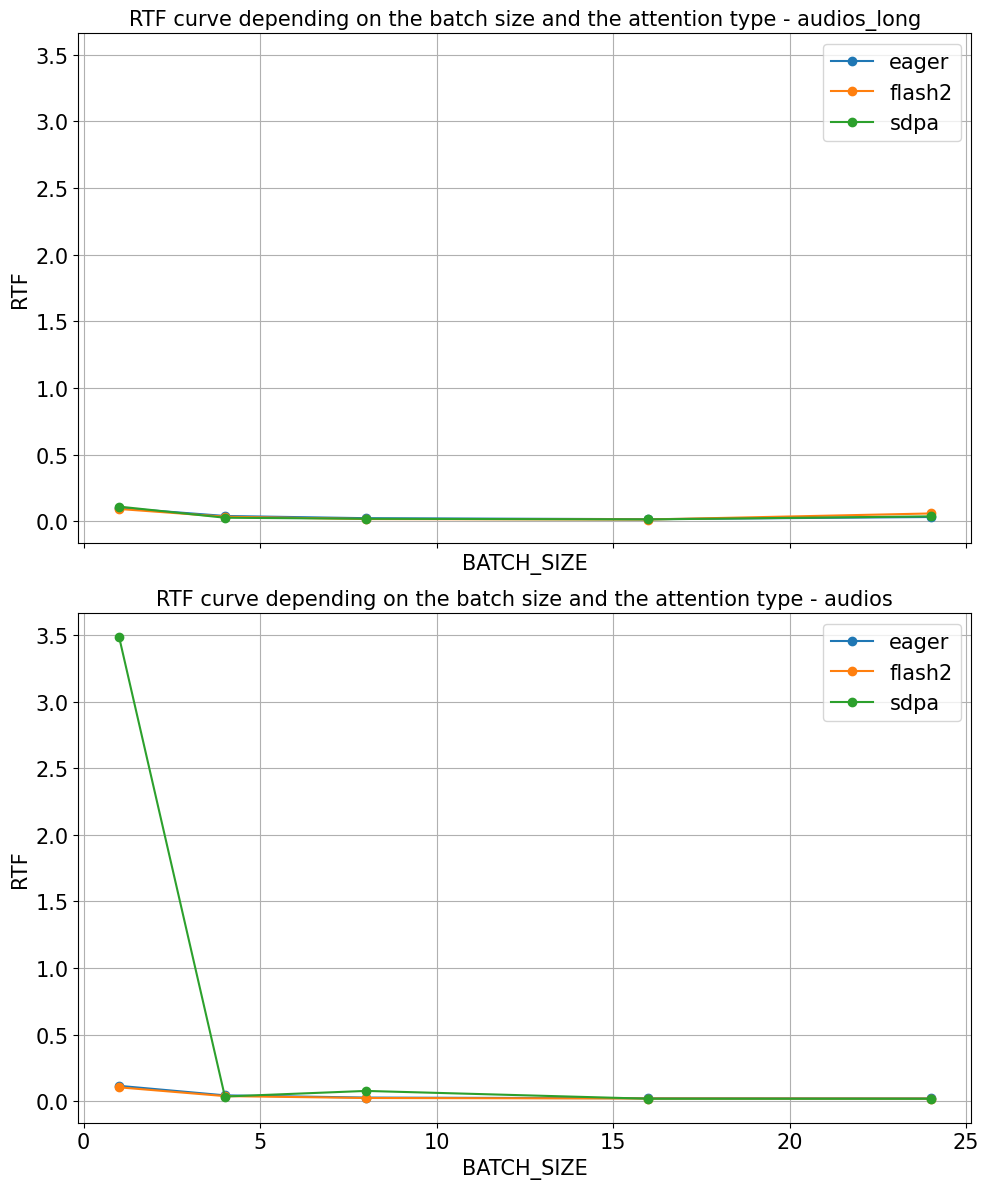

In [23]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "transformers_attn")
selected_rows = df[
    (df["backend"] == "transformers")
    & (df["vad"] == False)
    & (df["model"] == "openai/whisper-large-v3")
    & (df["batch_size"] == 16)
    & (df["audios_folder"] == "data/audios")
    & (df["device"] == "cuda")
]
make_plots(selected_rows, local_output_folder, "attn", subplots="num_beams")
selected_rows = df[
    (df["backend"] == "transformers")
    & (df["vad"] == False)
    & (df["model"] == "openai/whisper-large-v3")
]
plot_rtf_curve(
    selected_rows,
    local_output_folder,
    value="rtf",
    title="RTF curve depending on the batch size and the attention type",
    subplots="audios_folder",
    repeat_for="num_beams",
)

local_output_folder = os.path.join(OUTPUT_FOLDER, "transformers_batch")
selected_rows = df[
    (df["backend"] == "transformers")
    & (df["vad"] == False)
    & (df["model"] == "openai/whisper-large-v3")
    & (df["num_beams"] == 1)
    & (df["attn"] == "sdpa")
    & (df["audios_folder"] == "data/audios")
    & (df["device"] == "cuda")
]
make_plots(selected_rows, local_output_folder, "batch_size")

selected_rows = df[
    (df["backend"] == "transformers")
    & (df["vad"] == False)
    & (df["model"] == "openai/whisper-large-v3")
    & (df["num_beams"] == 1)
    & (
        (df["audios_folder"] == "data/audios")
        | (df["audios_folder"] == "data/audios_long")
    )
]
plot_rtf_curve(
    selected_rows,
    local_output_folder,
    value="rtf",
    title="RTF curve depending on the batch size and the attention type",
    subplots="audios_folder",
)

### Distilled models

In [24]:
local_output_folder = os.path.join(
    OUTPUT_FOLDER, "transformers_model_distilled"
)
selected_rows = df[
    (df["backend"] == "transformers")
    & (
        (df["model"] == "openai/whisper-large-v3")
        | (df["model"].str.startswith("bofen"))
    )
    & (df["attn"] == "sdpa")
    & (df["batch_size"] == 16)
    & (df["vad"] == False)
    & (df["num_beams"] == 1)
    & ((df["audios_folder"] == "data/audios"))
]
make_plots(selected_rows, local_output_folder, "model")

### Model sizes

In [25]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "transformers_model_sizes")
selected_rows = df[
    (df["backend"] == "transformers")
    & (df["model"].str.startswith("open"))
    & (df["attn"] == "sdpa")
    & (df["batch_size"] == 16)
    & (df["vad"] == False)
    & (df["num_beams"] == 1)
    & ((df["audios_folder"] == "data/audios"))
]
make_plots(selected_rows, local_output_folder, "model")

### VAD

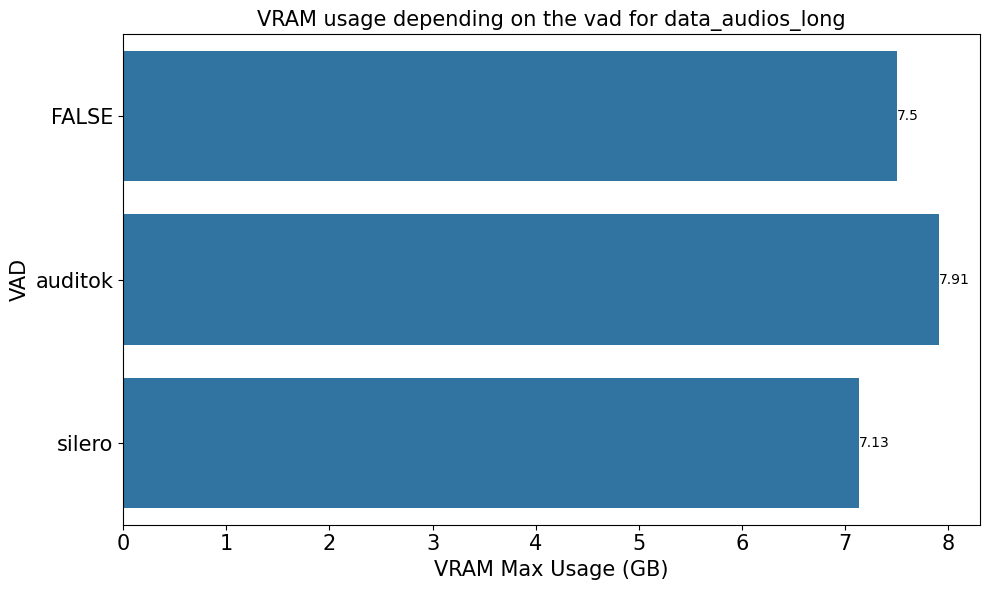

In [26]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "transformers_vad")
selected_rows = df[
    (df["backend"] == "transformers")
    & (df["batch_size"] == 8)
    & (df["num_beams"] == 1)
    & (df["attn"] == "sdpa")
    & (df["model"] == "openai/whisper-large-v3")
]
make_plots(selected_rows, local_output_folder, "vad", subplots="audios_folder")

## Faster-whisper

### Precision

In [27]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "faster_precision")
selected_rows = df[
    (df["backend"] == "faster-whisper")
    & (df["previous_text"] == False)
    & (df["audios_folder"] == "data/audios")
    & (df["model"].str.endswith("large-v3"))
    & (df["vad"] == False)
]
make_plots(selected_rows, local_output_folder, "precision")

### Condition on previous text

In [28]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "faster_previous-text")
selected_rows = df[
    (df["backend"] == "faster-whisper")
    & (df["precision"] == "float16")
    & (df["audios_folder"] == "data/audios")
    & (df["model"].str.endswith("large-v3"))
    & (df["vad"] == False)
]
make_plots(selected_rows, local_output_folder, "previous_text")

### LinTO

### TORCH VS CTRANSLATE

In [29]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "linto_backend")
selected_rows = df[
    (df["backend"] == "linto-stt")
    & (df["streaming"] == False)
    & (df["model"].str.endswith("large-v3"))
    & (df["vad"] == False)
    & (df["audios_folder"] == "data/audios")
    & (df["accurate"] == False)
    & (df["device"] == "cuda")
]
make_plots(selected_rows, local_output_folder, "docker_image")

### Accurate VS Greedy

In [30]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "linto_accurate")
selected_rows = df[
    (df["backend"] == "linto-stt")
    & (df["docker_image"] == "linto-stt-whisper:1.0.4")
    & (df["streaming"] == False)
    & (df["model"].str.endswith("large-v3"))
    & (df["vad"] == False)
    & (df["audios_folder"] == "data/audios")
    & (df["device"] == "cuda")
]
make_plots(selected_rows, local_output_folder, "accurate")

#### Model sizes

In [31]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "linto_model_sizes")
selected_rows = df[
    (df["backend"] == "linto-stt")
    & (~df["model"].str.startswith("bofen"))
    & (df["docker_image"] == "linto-stt-whisper:1.0.4")
    & (df["streaming"] == False)
    & (df["vad"] == False)
    & (df["audios_folder"] == "data/audios")
    & (df["accurate"] == False)
    & (df["device"] == "cuda")
]
make_plots(selected_rows, local_output_folder, "model")

#### Distilled models

In [32]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "linto_distilled")
selected_rows = df[
    (df["backend"] == "linto-stt")
    & (
        (df["model"].str.endswith("large-v3"))
        | (df["model"].str.startswith("bofen"))
        | (df["model"].str.startswith("large-v3-turbo"))
    )
    & (df["docker_image"] == "linto-stt-whisper:1.0.4")
    & (df["streaming"] == False)
    & (df["vad"] == False)
    & (df["audios_folder"] == "data/audios")
    & (df["accurate"] == False)
    & (df["device"] == "cuda")
]
make_plots(selected_rows, local_output_folder, "model")

#### VAD on LinTO

In [33]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "linto_vad")
selected_rows = df[
    (df["backend"] == "linto-stt")
    & (df["docker_image"] == "linto-stt-whisper:1.0.4")
    & (df["streaming"] == False)
    & (df["model"].str.endswith("large-v3"))
    & (df["audios_folder"] == "data/audios_silenced")
    & (df["accurate"] == False)
    & (df["device"] == "cuda")
]
make_plots(selected_rows, local_output_folder, "vad", subplots="audios_folder")

## Backends

In [34]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "backend")
selected_rows = df[
    (df["audios_folder"] == "data/audios")
    & (df["model"].str.endswith("large-v3"))
    & ((df["device"] == "cuda"))
    & ((df["batch_size"].isna()) | (df["batch_size"] == 8))
    & ((df["num_beams"].isna()) | (df["num_beams"] == 1))
    & ((df["accurate"].isna()) | (df["accurate"] == False))
    & ((df["attn"].isna()) | (df["attn"] == "sdpa"))
    & ((df["vad"].isna()) | (df["vad"] == False))
    & (
        (df["docker_image"].isna())
        | (df["docker_image"] == "linto-stt-whisper:1.0.4")
    )
    & ((df["streaming"].isna()) | (df["streaming"] == False))
    & (
        (df["precision"].isna())
        | ((df["precision"] == "float16") & (df["backend"] != "faster-whisper"))
    )
]
make_plots(selected_rows, local_output_folder, "backend")

## Streaming

### High VS Low Latency

/tmp/ipykernel_12260/431128154.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows["streaming_latency"] = selected_rows.apply(


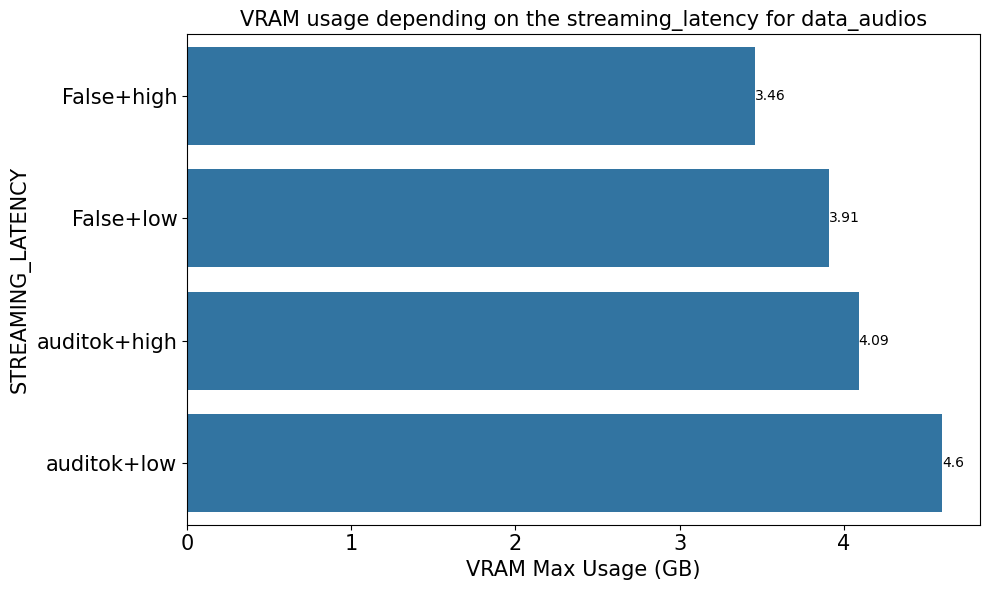

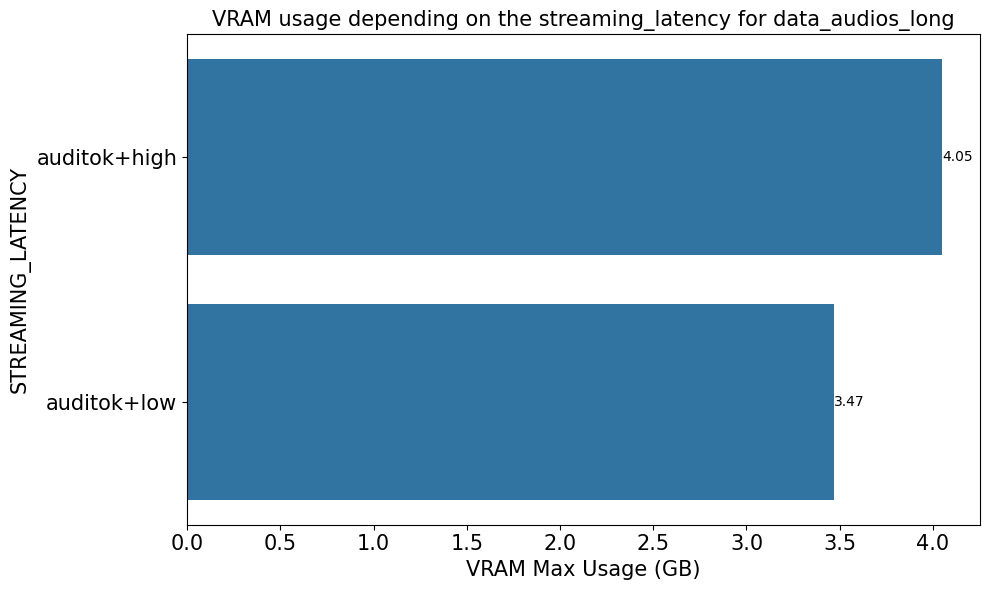

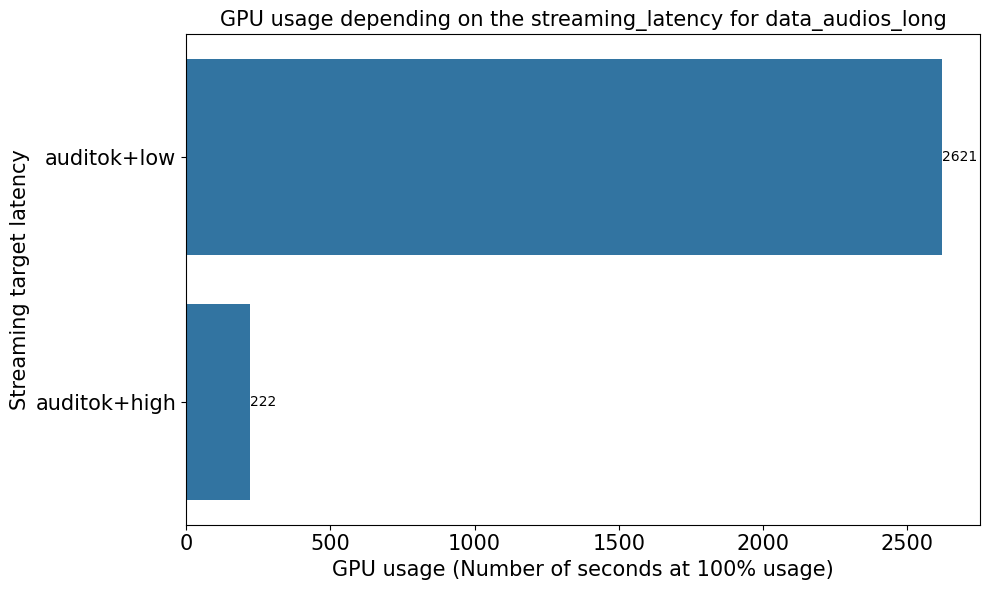

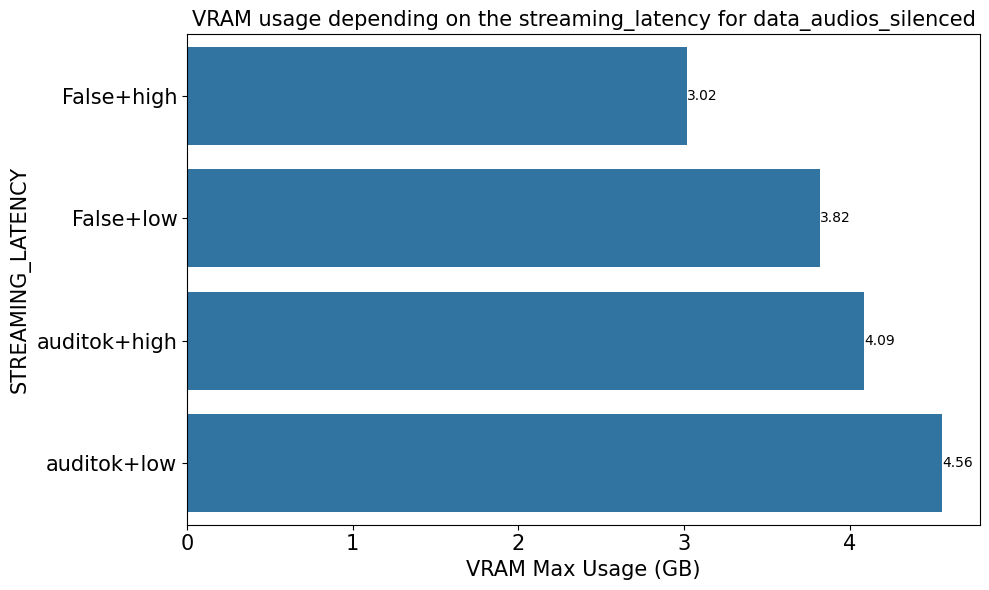

In [35]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "linto_streaming")
selected_rows = df[
    (df["backend"] == "linto-stt")
    & (df["docker_image"] == "linto-stt-whisper:1.0.4")
    & (df["streaming"] == True)
    & (df["model"].str.endswith("large-v3"))
    & (df["accurate"] == False)
    & (df["device"] == "cuda")
]
selected_rows["streaming_latency"] = selected_rows.apply(
    lambda row: (
        f"{row['vad']}+low"
        if row["streaming_min_chunk_size"] < 1
        else f"{row['vad']}+high"
    ),
    axis=1,
)
make_plots(
    selected_rows,
    local_output_folder,
    "streaming_latency",
    subplots="audios_folder",
)

### Streaming vs Offline

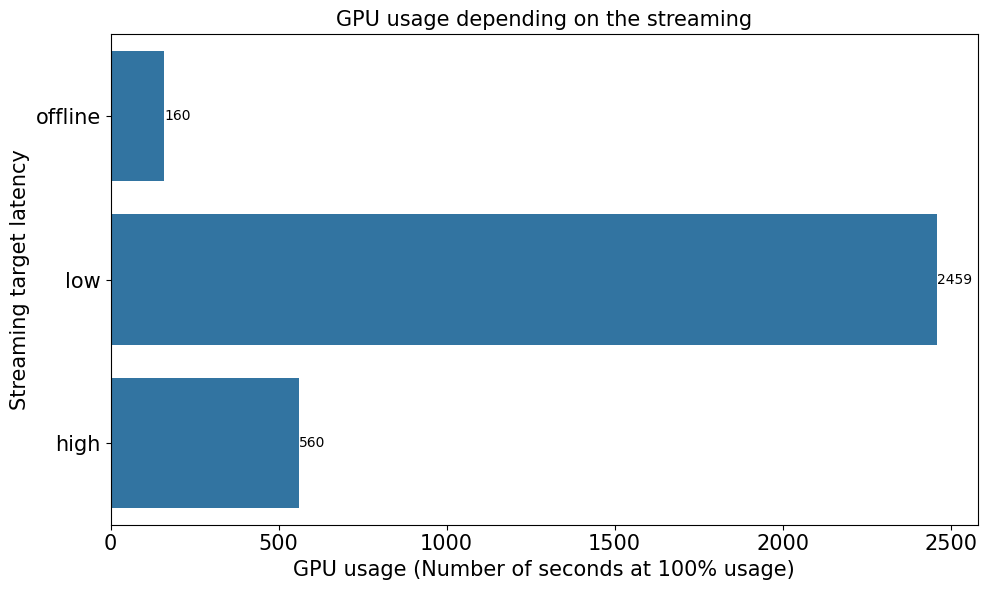

In [36]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "linto_streaming_vs_offline")
selected_rows = df[
    (df["backend"] == "linto-stt")
    & (df["docker_image"] == "linto-stt-whisper:1.0.4")
    & (df["vad"] == False)
    & (df["model"].str.endswith("large-v3"))
    & (df["audios_folder"] == "data/audios")
    & (df["accurate"] == False)
    & (df["device"] == "cuda")
]
make_plots(selected_rows, local_output_folder, "streaming")

# CPU

## LINTO

### Distilled

In [37]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "linto_cpu_distilled")
selected_rows = df[
    (df["backend"] == "linto-stt")
        & (
        (df["docker_image"]=="linto-stt-whisper-cpu:1.0.4")
        | (df["docker_image"]=="whisper/Dockerfile.ctranslate2.cpu")
    )        
    & (df["streaming"] == False)
    & (df["vad"] == False)
    & (df["audios_folder"] == "data/audios")
    & (df["accurate"] == False)
    & (df["device"] == "cpu")
]
make_plots(selected_rows, local_output_folder, "model")

### WHISPER VS KALDI

In [38]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "linto_cpu_kaldi")
selected_rows = df[
    (
        ((df["backend"]=="linto-stt")
            & (
                (df["docker_image"]=="linto-stt-whisper-cpu:1.0.4")
                | (df["docker_image"]=="whisper/Dockerfile.ctranslate2.cpu")
            )   
            & (df["streaming"] == False)
            & (df["vad"] == False)
            & (df["audios_folder"] == "data/audios")
            & (df["accurate"] == False)
            & (df["device"] == "cpu")
            & (
                (df["model"].str.endswith("large-v3"))
                | (df["model"].str.startswith("large-v3-turbo"))
            )
         )
        | (df["backend"]=="http-api")
    )
]
make_plots(selected_rows, local_output_folder, "model")

## Transformers

In [39]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "transformers_cpu_threads")
selected_rows = df[
    (df["backend"] == "transformers")
    & (df["precision"] == "float32")
    & (df["vad"] == False)
    & (df["audios_folder"] == "data/audios")
    & (df["device"] == "cpu")
]
make_plots(selected_rows, local_output_folder, "num_threads")

## Backends (Transformers VS LinTO-STT)

In [40]:
local_output_folder = os.path.join(OUTPUT_FOLDER, "cpu_backend")
selected_rows = df[
    ((df["accurate"].isna()) | (df["streaming"] == False))
    & (df["model"].str.endswith("large-v3"))
    & (df["audios_folder"] == "data/audios")
    & ((df["accurate"].isna()) | (df["accurate"] == False))
    & (df["vad"] == False)
    & (df["device"] == "cpu")
    & ((df["num_threads"].isna()) | (df["num_threads"] == 4))
]
selected_rows["backend"] = selected_rows.apply(
    lambda row: (
        row["backend"]
        if row["backend"] != "linto-stt"
        else row["docker_image"].split(".")[1]
    ),
    axis=1,
)
make_plots(selected_rows, local_output_folder, "backend")

/tmp/ipykernel_12260/779217176.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows["backend"] = selected_rows.apply(
